In [ ]:
'''
Note : Code has been reference from multiple github source

# Steps 
'''
# Read the data from shared Directory
# Represent the data as pandas framework('room type', 'image path')
# Resize the images into 64*64 using Open CV (cv2.resize)
# Transform the Resized Images into array (cv2.imread)
# Nomalize the images array by dividing by 255.0
# Create Label Encoder for the rooms Labels (bed_room = 0;dining_room = 1;living_room = 2)
# Convert the Label encoder to One Hot Encoding representation (This will be our Y)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

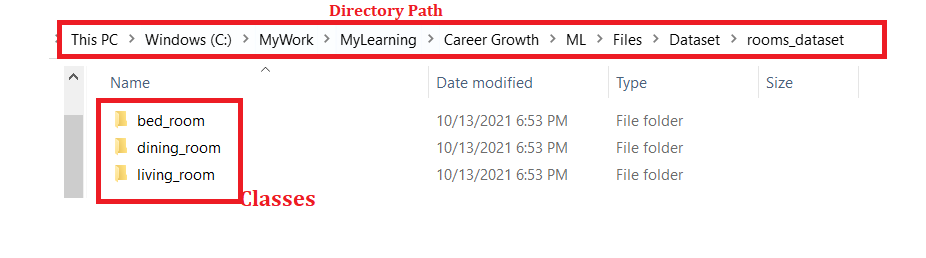

In [2]:
# Read The data from the cntral location (directory)

dataset_path = os.listdir('C:/MyWork/MyLearning/Career Growth/ML/Files/Dataset/rooms_dataset')

room_types = os.listdir('C:/MyWork/MyLearning/Career Growth/ML/Files/Dataset/rooms_dataset')

print("Types of rooms found: ", len(dataset_path))

Types of rooms found:  3


In [3]:

# Go through the Directory of data set 'Rooms' and subfolders 'bed_room' and 'dining_room' and 'living_room'

rooms = []

for item in room_types:
    
 # Get all the file names
 all_rooms = os.listdir('C:/MyWork/MyLearning/Career Growth/ML/Files/Dataset/rooms_dataset' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('C:/MyWork/MyLearning/Career Growth/ML/Files/Dataset/rooms_dataset' + '/' +item) + '/' + room))


In [4]:
# Create Data Frame of two columns 'Room type' and 'Image path'
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])

In [5]:
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

Total number of rooms in the dataset:  393


In [6]:
rooms_df

,room type,image
0,bed_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...
1,bed_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...
2,bed_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...
3,bed_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...
4,bed_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...
...,...,...
388,living_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...
389,living_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...
390,living_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...
391,living_room,C:/MyWork/MyLearning/Career Growth/ML/Files/Da...


In [7]:
import cv2
path = 'C:/MyWork/MyLearning/Career Growth/ML/Files/Dataset/rooms_dataset/'

im_size = 64

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
   # print(filenames)  # will get the names of all images
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
labels[:3]

['bed_room', 'bed_room', 'bed_room']

In [11]:
# Transform the image array to a numpy type
images = np.array(images)
images.shape   

(393, 64, 64, 3)

In [12]:
images = images.astype('float32') / 255.0

In [15]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

y=rooms_df['room type'].values
#print(y[:5])

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [16]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=rooms_df['room type'].values
#print(y[:5])

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
#print (y)

y=y.reshape(-1,1)
#Converted  scalar output into vector output where the correct class will be 1 and other will be 0
onehotencoder = OneHotEncoder(categories='auto') 
Y= onehotencoder.fit_transform(y)
Y.shape  #(393, 3)

(393, 3)

In [20]:
Y.toarray()[0]

array([1., 0., 0.])

In [21]:
images[0].shape # final shape of the Input Data for trainig

(64, 64, 3)

In [26]:
images[0]

array([[[0.00215302, 0.00253749, 0.00293733],
        [0.0021684 , 0.00255286, 0.00295271],
        [0.00221453, 0.00261438, 0.00298347],
        ...,
        [0.00224529, 0.00255286, 0.00293733],
        [0.00219915, 0.00250673, 0.0028912 ],
        [0.00215302, 0.00246059, 0.00284506]],

       [[0.00218378, 0.00256824, 0.00296809],
        [0.00210688, 0.00249135, 0.0028912 ],
        [0.00219915, 0.00258362, 0.00299885],
        ...,
        [0.00224529, 0.00253749, 0.00293733],
        [0.00219915, 0.00249135, 0.0028912 ],
        [0.00213764, 0.00242983, 0.00282968]],

       [[0.00206075, 0.00244521, 0.00284506],
        [0.00215302, 0.00253749, 0.00293733],
        [0.00215302, 0.00252211, 0.00295271],
        ...,
        [0.00224529, 0.00253749, 0.00295271],
        [0.00219915, 0.00249135, 0.00290657],
        [0.00215302, 0.00244521, 0.00286044]],

       ...,

       [[0.00092272, 0.00141484, 0.00204537],
        [0.00092272, 0.0014456 , 0.00210688],
        [0.00098424, 0